# **Examen 01**
---
## *Subcoordinación de Posgrado y Educación Continua.*
### [Instituto Mexicano de Tecnología del Agua](https://www.gob.mx/imta).<br>

<img src="Imagenes/imta_logo.png" style="height: 5em; vertical-align: middle;">
<img src="Imagenes/Mexico.jpg" style="height: 5em; vertical-align: middle;">

**Alumno: Ing. Omar Ulises Robles Pereyra** <br>
**Tutor: Dr. Ariosto Aguilar Chávez** <br>

[![Open In Colab](Imagenes/colab-badge.svg)](https://colab.research.google.com/github/OmarURP/Mecanica_Fluidos/blob/main/Examen_01_Graficacion.ipynb)

---
> # **Este notebook contiene las visualizaciones para los problemas 2 y 3 del examen parcial.**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Configuración para gráficas más bonitas
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

### **Problema 2: Distribución de Presión sobre una Pared**

#### Ecuación obtenida:
$$p(y) = p_0 - \frac{\rho m^2 y^2}{2\pi^2 (y^2 + d^2)^2}$$

In [20]:
# Parámetros del Problema 2
rho = 1000  # kg/m³ (densidad del agua)
m = 10      # m²/s (intensidad de la fuente)
d = 1.0     # m (distancia de la fuente a la pared)
p0 = 101325 # Pa (presión atmosférica)

# Rango de y
y = np.linspace(-5*d, 5*d, 500)

# Cálculo de la presión
p = p0 - (rho * m**2 * y**2) / (2 * np.pi**2 * (y**2 + d**2)**2)

# Cálculo del componente de velocidad v(0,y)
v = (m * y) / (np.pi * (y**2 + d**2))

# Cálculo de q² (cuadrado de la magnitud de velocidad)
q_cuad = v**2

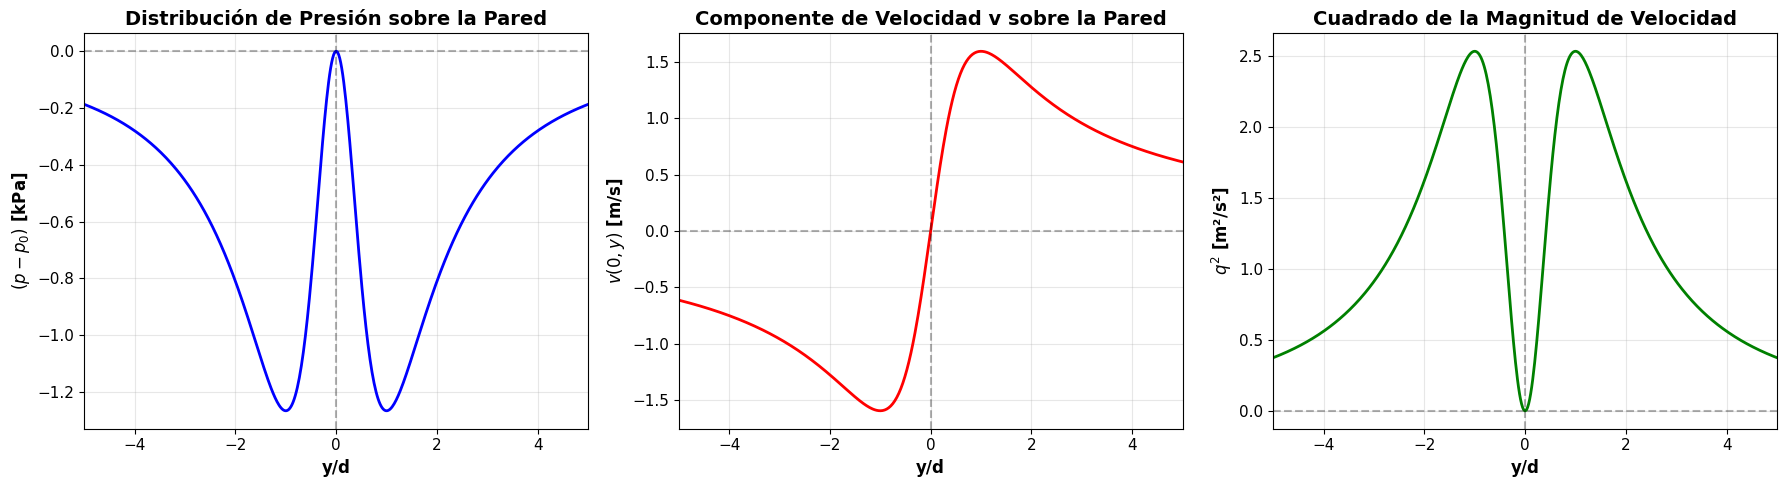

In [21]:
# Gráfica 1: Distribución de presión
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Presión vs posición
ax1.plot(y/d, (p - p0)/1000, 'b-', linewidth=2)
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='--', alpha=0.3)
ax1.set_xlabel('y/d', fontsize=12, fontweight='bold')
ax1.set_ylabel('$(p - p_0)$ [kPa]', fontsize=12, fontweight='bold')
ax1.set_title('Distribución de Presión sobre la Pared', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim([-5, 5])

# Velocidad vs posición
ax2.plot(y/d, v, 'r-', linewidth=2)
ax2.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax2.axvline(x=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('y/d', fontsize=12, fontweight='bold')
ax2.set_ylabel('$v(0,y)$ [m/s]', fontsize=12, fontweight='bold')
ax2.set_title('Componente de Velocidad v sobre la Pared', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xlim([-5, 5])

# Cuadrado de la velocidad
ax3.plot(y/d, q_cuad, 'g-', linewidth=2)
ax3.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax3.axvline(x=0, color='k', linestyle='--', alpha=0.3)
ax3.set_xlabel('y/d', fontsize=12, fontweight='bold')
ax3.set_ylabel('$q^2$ [m²/s²]', fontsize=12, fontweight='bold')
ax3.set_title('Cuadrado de la Magnitud de Velocidad', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.set_xlim([-5, 5])

plt.tight_layout()
#plt.savefig('problema2_distribucion.png', dpi=300, bbox_inches='tight')

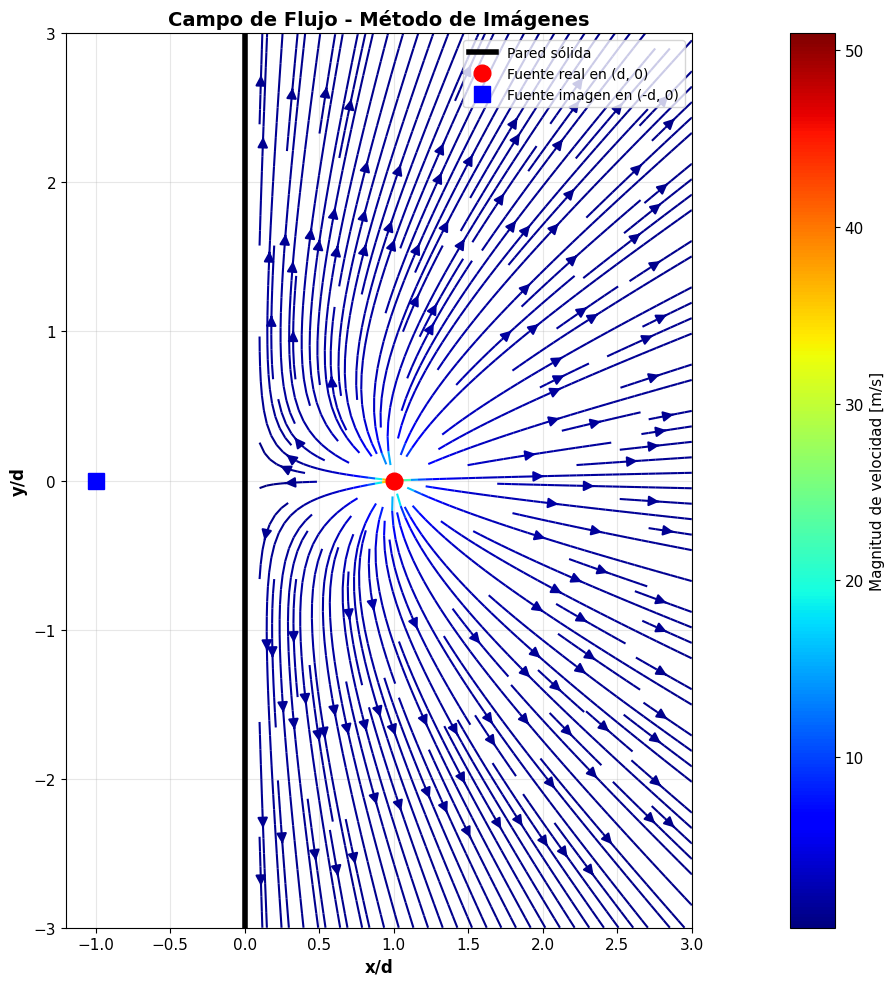

In [22]:
# Gráfica 2: Campo de flujo (líneas de corriente) - Problema 2
fig, ax = plt.subplots(figsize=(20, 10))

# Crear malla para el campo de velocidad
x_rango = np.linspace(0.1, 3*d, 100)
y_rango = np.linspace(-3*d, 3*d, 100)
X, Y = np.meshgrid(x_rango, y_rango)

# Cálculo del campo de velocidad completo
# Fuente en (d, 0) e imagen en (-d, 0)
r1_sqr = (X - d)**2 + Y**2
r2_sqr = (X + d)**2 + Y**2

# Componentes de velocidad
U = m/(2*np.pi) * ((X - d)/r1_sqr + (X + d)/r2_sqr)
V = m/(2*np.pi) * (Y/r1_sqr + Y/r2_sqr)

# Magnitud de velocidad
vel_mag = np.sqrt(U**2 + V**2)

# Líneas de corriente
strm = ax.streamplot(X, Y, U, V, color=vel_mag, cmap='jet', 
                      density=2, linewidth=1.5, arrowsize=1.5)

# Marcar la pared en x=0
ax.axvline(x=0, color='black', linewidth=4, label='Pared sólida')

# Marcar fuente e imagen
ax.plot(d, 0, 'ro', markersize=12, label=f'Fuente real en (d, 0)')
ax.plot(-d, 0, 'bs', markersize=12, label=f'Fuente imagen en (-d, 0)')

# Configuración de la gráfica
ax.set_xlabel('x/d', fontsize=12, fontweight='bold')
ax.set_ylabel('y/d', fontsize=12, fontweight='bold')
ax.set_title('Campo de Flujo - Método de Imágenes', fontsize=14, fontweight='bold')
#ax.set_xlim([-0.5, 3])
#ax.set_ylim([-3, 3])
ax.legend(loc='upper right', fontsize=10)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

# Barra de color
cbar = plt.colorbar(strm.lines, ax=ax, label='Magnitud de velocidad [m/s]')

plt.tight_layout()
#plt.savefig('problema2_campo_flujo.png', dpi=300, bbox_inches='tight')

---
### **Problema 3: Flujo de Poiseuille Transitorio**

#### Ecuación obtenida:
$$u(y,t) = -\frac{1}{2\mu}\frac{dp}{dx}(hy - y^2) - \sum_{n=1,3,5,...}^{\infty} \frac{4Gh^2}{vn^3\pi^3} e^{-v\left(\frac{n\pi}{h}\right)^2 t} \sin\left(\frac{n\pi y}{h}\right)$$

In [23]:
# Parámetros del Problema 3
h = 0.01        # m (altura del canal)
mu = 0.001      # Pa·s (viscosidad dinámica del agua)
rho = 1000      # kg/m³ (densidad)
nu = mu / rho   # m²/s (viscosidad cinemática)
dp_dx = -100    # Pa/m (gradiente de presión)
G = -dp_dx / rho  # Fuerza por unidad de masa

# Rango de y
y = np.linspace(0, h, 100)

# Función para calcular u(y,t)
def u_poiseuille(y, t, no_terminos=50):
    """
    Calcula el perfil de velocidad para el flujo de Poiseuille transitorio
    
    Parámetros:
    y: posición en dirección y
    t: tiempo
    n_terms: número de términos en la serie de Fourier
    """
    # Parte permanente (perfil parabólico de Hagen-Poiseuille)
    u_p = (G / (2*nu)) * (h*y - y**2)
    
    # Parte transitoria (serie de Fourier)
    u_t = np.zeros_like(y)
    
    for n in range(1, no_terminos*2, 2):  # Solo términos impares
        coef = (4*G*h**2) / (nu * n**3 * np.pi**3)
        exponencial = np.exp(-nu * (n*np.pi/h)**2 * t)
        seno = np.sin(n*np.pi*y/h)
        u_t += coef * exponencial * seno

    return u_p - u_t

# Tiempos a graficar
t_caract = h**2 / nu  # Tiempo característico
tiempos = [0, 0.01*t_caract, 0.05*t_caract, 0.1*t_caract, 0.5*t_caract, t_caract, 5*t_caract, np.inf]
tiempos_text = ['t = 0', 't = 0.01τ', 't = 0.05τ', 't = 0.1τ', 't = 0.5τ', 't = τ', 't = 5τ', 't → ∞']

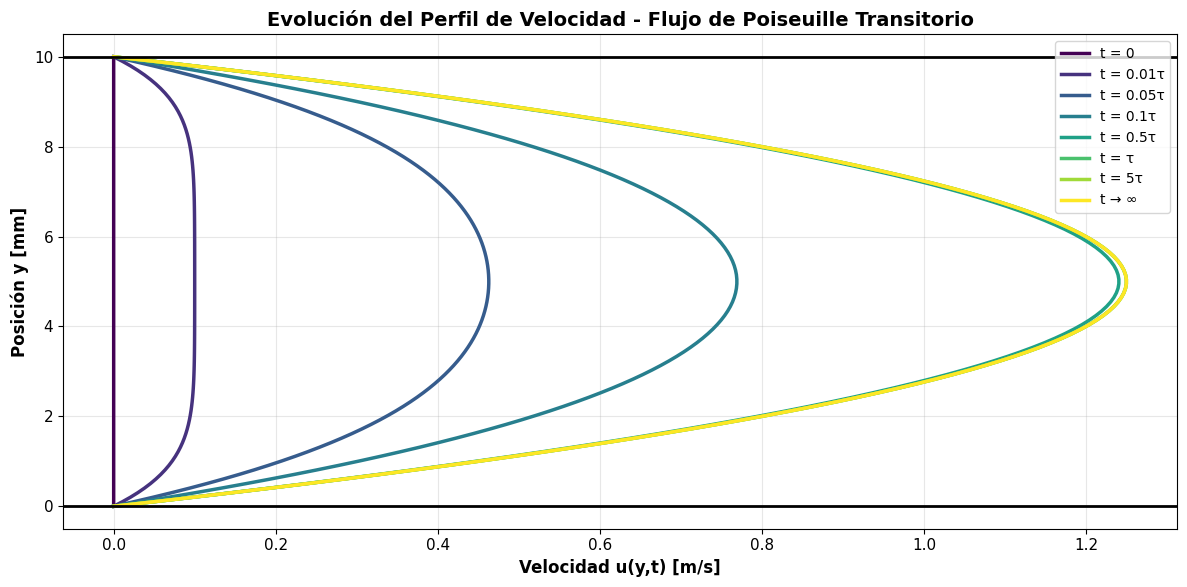

In [24]:
# Gráfica 3: Evolución del perfil de velocidad
fig, ax = plt.subplots(figsize=(12, 6))

colores = plt.cm.viridis(np.linspace(0, 1, len(tiempos)))

for i, (t, label) in enumerate(zip(tiempos, tiempos_text)):
    if t == np.inf:
        # Solución en estado estacionario
        u = (G / (2*nu)) * (h*y - y**2)
    else:
        u = u_poiseuille(y, t)
    
    ax.plot(u, y*1000, linewidth=2.5, color=colores[i], label=label)

ax.set_xlabel('Velocidad u(y,t) [m/s]', fontsize=12, fontweight='bold')
ax.set_ylabel('Posición y [mm]', fontsize=12, fontweight='bold')
ax.set_title('Evolución del Perfil de Velocidad - Flujo de Poiseuille Transitorio', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='best', fontsize=10)
ax.axhline(y=0, color='k', linewidth=2)
ax.axhline(y=h*1000, color='k', linewidth=2)

plt.tight_layout()
#plt.savefig('problema3_perfiles_velocidad.png', dpi=300, bbox_inches='tight')

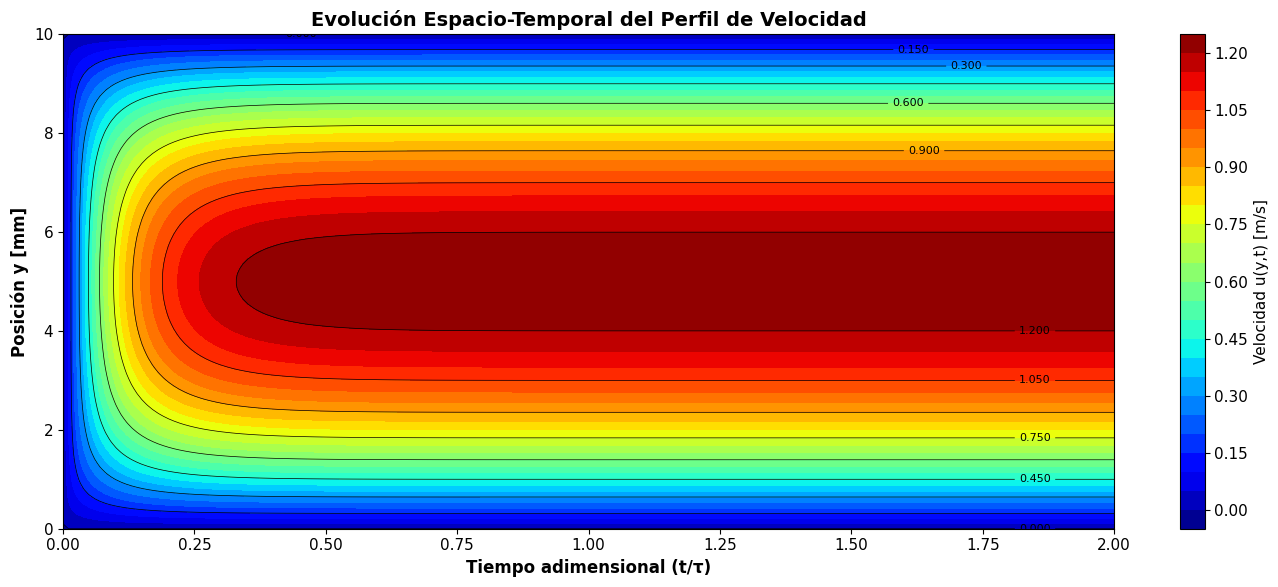

In [25]:
# Gráfica 4: Contorno 2D de la evolución temporal
fig, ax = plt.subplots(figsize=(14, 6))

# Crear malla temporal
t_vect = np.linspace(0, 2*t_caract, 200)
Y, T = np.meshgrid(y*1000, t_vect/t_caract)

# Calcular u(y,t) para cada punto
U = np.zeros_like(Y)
for i, t in enumerate(t_vect):
    U[i, :] = u_poiseuille(y, t)

# Gráfica de contorno
contourf = ax.contourf(T, Y, U, levels=30, cmap='jet')
contour = ax.contour(T, Y, U, levels=10, colors='black', linewidths=0.5, alpha=1)
ax.clabel(contour, inline=True, fontsize=8, fmt='%.3f')

ax.set_xlabel('Tiempo adimensional (t/τ)', fontsize=12, fontweight='bold')
ax.set_ylabel('Posición y [mm]', fontsize=12, fontweight='bold')
ax.set_title('Evolución Espacio-Temporal del Perfil de Velocidad', 
             fontsize=14, fontweight='bold')

cbar = plt.colorbar(contourf, ax=ax, label='Velocidad u(y,t) [m/s]')

plt.tight_layout()
#plt.savefig('problema3_contorno_temporal.png', dpi=300, bbox_inches='tight')

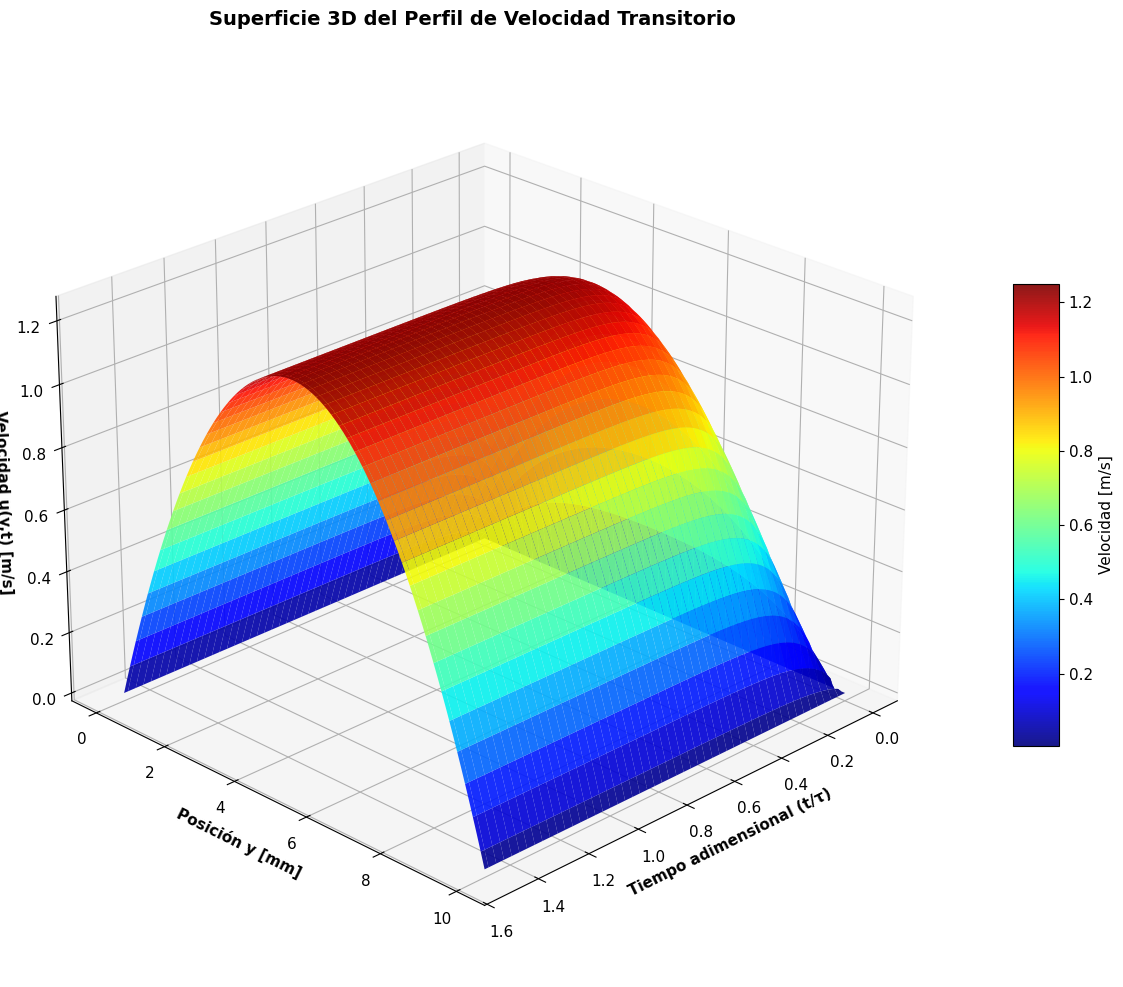

In [26]:
# Gráfica 5: Campo de velocidad 3D
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Crear superficie 3D
t_rango_3d = np.linspace(0, 1.5*t_caract, 100)
Y_3d, T_3d = np.meshgrid(y*1000, t_rango_3d/t_caract)

U_3d = np.zeros_like(Y_3d)
for i, t in enumerate(t_rango_3d):
    U_3d[i, :] = u_poiseuille(y, t)

surf = ax.plot_surface(T_3d, Y_3d, U_3d, cmap='jet', 
                        edgecolor='none', alpha=0.9, antialiased=True)

ax.set_xlabel('Tiempo adimensional (t/τ)', fontsize=11, fontweight='bold')
ax.set_ylabel('Posición y [mm]', fontsize=11, fontweight='bold')
ax.set_zlabel('Velocidad u(y,t) [m/s]', fontsize=11, fontweight='bold')
ax.set_title('Superficie 3D del Perfil de Velocidad Transitorio', 
             fontsize=14, fontweight='bold', pad=20)

# Agregar barra de color
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Velocidad [m/s]')

# Ajustar el ángulo de vista
ax.view_init(elev=25, azim=45)

plt.tight_layout()
#plt.savefig('problema3_superficie_3d.png', dpi=300, bbox_inches='tight')

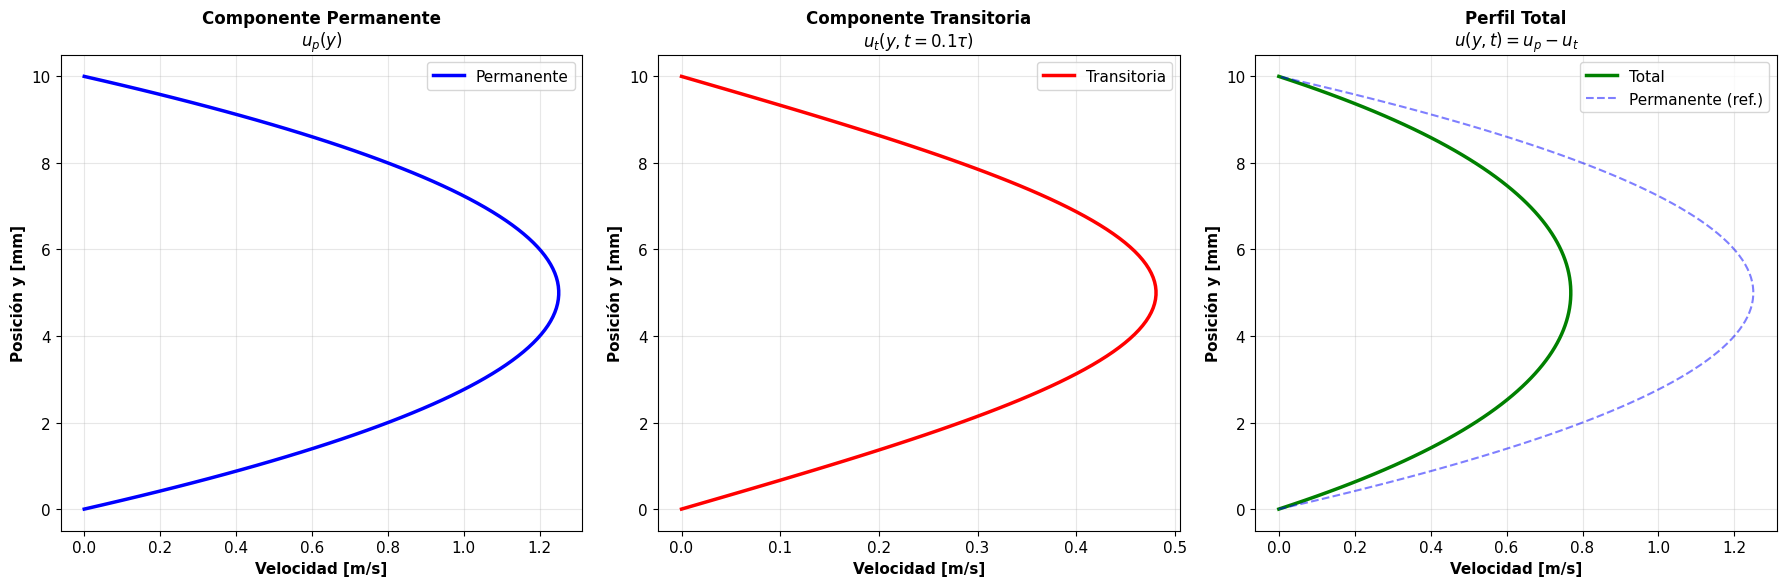

In [27]:
# Gráfica 6: Comparación de componentes (permanente vs transitoria)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Seleccionar un tiempo intermedio
t_seleccionado = 0.1 * t_caract

# Componente permanente
u_permanente = (G / (2*nu)) * (h*y - y**2)

# Componente transitoria
u_transitoria = np.zeros_like(y)
for n in range(1, 51*2, 2):
    coef = (4*G*h**2) / (nu * n**3 * np.pi**3)
    exponencial = np.exp(-nu * (n*np.pi/h)**2 * t_seleccionado)
    seno = np.sin(n*np.pi*y/h)
    u_transitoria += coef * exponencial * seno

# Total
u_total = u_permanente - u_transitoria

# Gráfica 1: Componente permanente
ax1.plot(u_permanente, y*1000, 'b-', linewidth=2.5, label='Permanente')
ax1.set_xlabel('Velocidad [m/s]', fontsize=11, fontweight='bold')
ax1.set_ylabel('Posición y [mm]', fontsize=11, fontweight='bold')
ax1.set_title('Componente Permanente\n$u_p(y)$', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Gráfica 2: Componente transitoria
ax2.plot(u_transitoria, y*1000, 'r-', linewidth=2.5, label='Transitoria')
ax2.set_xlabel('Velocidad [m/s]', fontsize=11, fontweight='bold')
ax2.set_ylabel('Posición y [mm]', fontsize=11, fontweight='bold')
ax2.set_title(f'Componente Transitoria\n$u_t(y, t=0.1\\tau)$', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Gráfica 3: Total
ax3.plot(u_total, y*1000, 'g-', linewidth=2.5, label='Total')
ax3.plot(u_permanente, y*1000, 'b--', linewidth=1.5, alpha=0.5, label='Permanente (ref.)')
ax3.set_xlabel('Velocidad [m/s]', fontsize=11, fontweight='bold')
ax3.set_ylabel('Posición y [mm]', fontsize=11, fontweight='bold')
ax3.set_title(f'Perfil Total\n$u(y,t) = u_p - u_t$', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()

plt.tight_layout()
#plt.savefig('problema3_componentes.png', dpi=300, bbox_inches='tight')

## Resumen de Resultados

### Problema 2:
- La presión sobre la pared alcanza su valor mínimo en y = 0 (punto de estancamiento)
- La velocidad tangencial v(0,y) es cero en y = 0 y aumenta con |y|
- El método de imágenes simula correctamente la pared sólida con condición de no penetración

### Problema 3:
- En t = 0: El fluido está en reposo, u(y,0) = 0
- Para t > 0: El perfil comienza a desarrollarse desde las paredes hacia el centro
- Para t → ∞: El perfil converge al perfil parabólico de Hagen-Poiseuille
- El tiempo característico τ = h²/ν determina la escala temporal del proceso transitorio